# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [23]:
type(cities)

list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
# Include a print log with the city number, city name, and URL

count = 1
latitude = []
longitude = []
temperature = []
humidity = []
cloud = []
windSpeed = []
country = []
cityName = []
date = []
baseURL = "https://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    # Build query URL
    parameters = {
        "appid": weather_api_key,
        "q": city,
        "units": "imperial"
    }
    print('Processing City # {} | {}'.format(count, city))
    try:
        res = requests.get(baseURL, params=parameters).json()
        if "name" in res:
            cityName.append(res["name"])
            date.append(res["dt"])
            if "clouds" in res:
                cloud.append(res["clouds"]["all"])
            else:
                cloud.append("")
            if "sys" in res:    
                country.append(res["sys"]["country"])
            else:
                country.append("")
            if"main" in res:
                humidity.append(res["main"]["humidity"])
            else:
                humidity.append("")
            if "main" in res:
                temperature.append(res["main"]["temp_max"])
            else:
                temperature.append("")
            if "coord" in res: 
                latitude.append(res["coord"]["lat"])
            else:
                latitude.append("")
            if "coord" in res: 
                longitude.append(res["coord"]["lon"])
            else:
                longitude.append("")
            if "wind" in res:
                windSpeed.append(res["wind"]["speed"])
            else:
                windSpeed.append("")
   
        else:
             print('City "{}" not found. skipping...'.format(city))
        
           
    except Exception as ex: 
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print (message)
        print('City "{}" not found. skipping...'.format(city))
    count += 1


Processing City # 1 | saint-philippe
Processing City # 2 | mataura
Processing City # 3 | suntar
Processing City # 4 | saskylakh
Processing City # 5 | dingle
Processing City # 6 | qaanaaq
Processing City # 7 | hobart
Processing City # 8 | ushuaia
Processing City # 9 | yakima
Processing City # 10 | san patricio
Processing City # 11 | rikitea
Processing City # 12 | upernavik
Processing City # 13 | hammerfest
Processing City # 14 | new norfolk
Processing City # 15 | nichinan
Processing City # 16 | dikson
Processing City # 17 | werota
Processing City # 18 | beyneu
Processing City # 19 | krasnorechenskiy
Processing City # 20 | yumen
Processing City # 21 | cape town
Processing City # 22 | bousso
City "bousso" not found. skipping...
Processing City # 23 | port elizabeth
Processing City # 24 | tiksi
Processing City # 25 | thompson
Processing City # 26 | bonavista
Processing City # 27 | barentsburg
City "barentsburg" not found. skipping...
Processing City # 28 | tuktoyaktuk
Processing City # 29 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
weather_df = pd.DataFrame({
     'City':cityName,
     'Cloudiness':cloud,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':latitude,
     'Lng':longitude,
     'Max Temperature':temperature,
     'Wind Speed':windSpeed,
     })
weather_df.to_csv(output_data_file)
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Saint-Philippe,90,CA,1578004097,74,45.36,-73.48,39.20,9.17
1,Mataura,53,NZ,1578004097,64,-46.19,168.86,55.00,17.00
2,Suntar,100,RU,1578004097,97,62.16,117.65,-0.53,3.42
3,Saskylakh,5,RU,1578004098,91,71.97,114.09,-17.01,8.25
4,Dingle,100,PH,1578004098,94,11.00,122.67,73.13,9.53


In [58]:
weather_df.count()

City               542
Cloudiness         542
Country            542
Date               542
Humidity           542
Lat                542
Lng                542
Max Temperature    542
Wind Speed         542
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

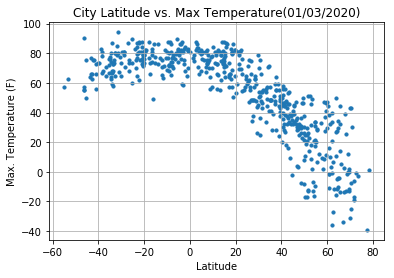

In [65]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temperature"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(01/03/2020)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/latitude_vs_temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

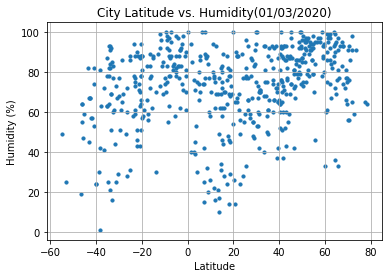

In [67]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(01/03/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/humidity_vs_latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

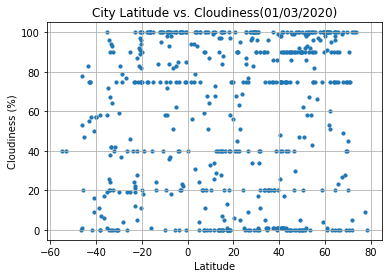

In [68]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(01/03/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/cloudiness_vs_latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

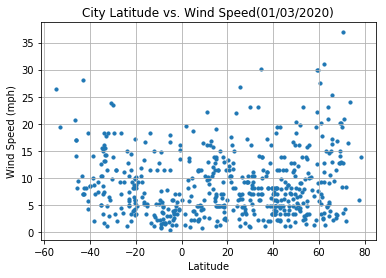

In [69]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(01/03/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/windspeed_vs_latitude.png")

# Show plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


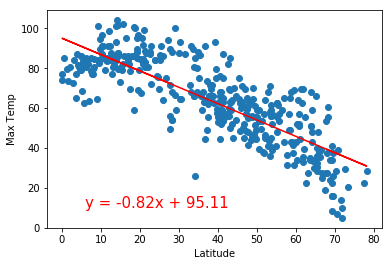

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


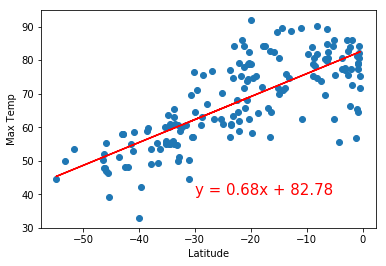

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


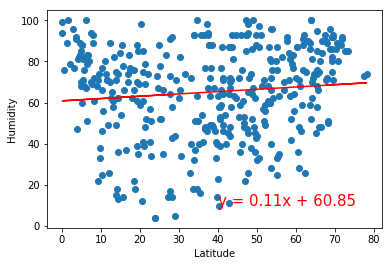

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


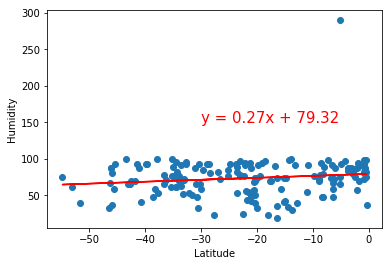

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


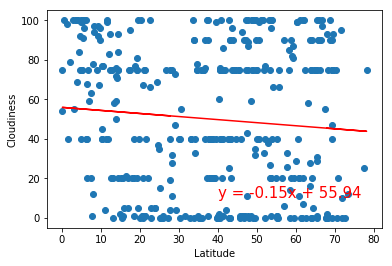

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


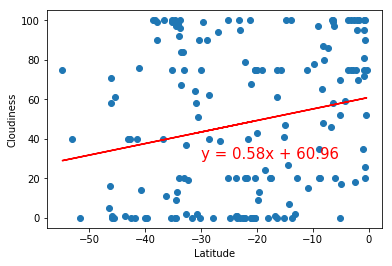

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


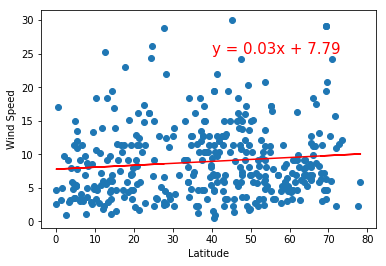

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


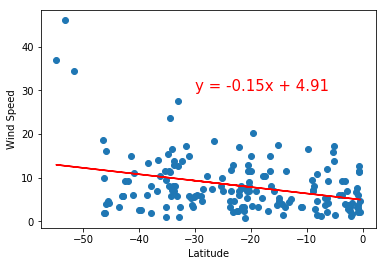